#100 EPOCH

#Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Train

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("university-bwrcv").project("head-motion")
dataset = project.version(3).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Head-motion-3 in yolov8:: 100%|██████████| 9610/9610 [00:00<00:00, 12198.28it/s]


## Custom Training

In [ ]:
# Create a YOLO model instance
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(data='/content/Head-motion-3/data.yaml', epochs=100, imgsz=128, rect=True, plots=True, save_period=1)

100%|██████████| 6.23M/6.23M [00:00<00:00, 300MB/s]
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Head-motion-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=128, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

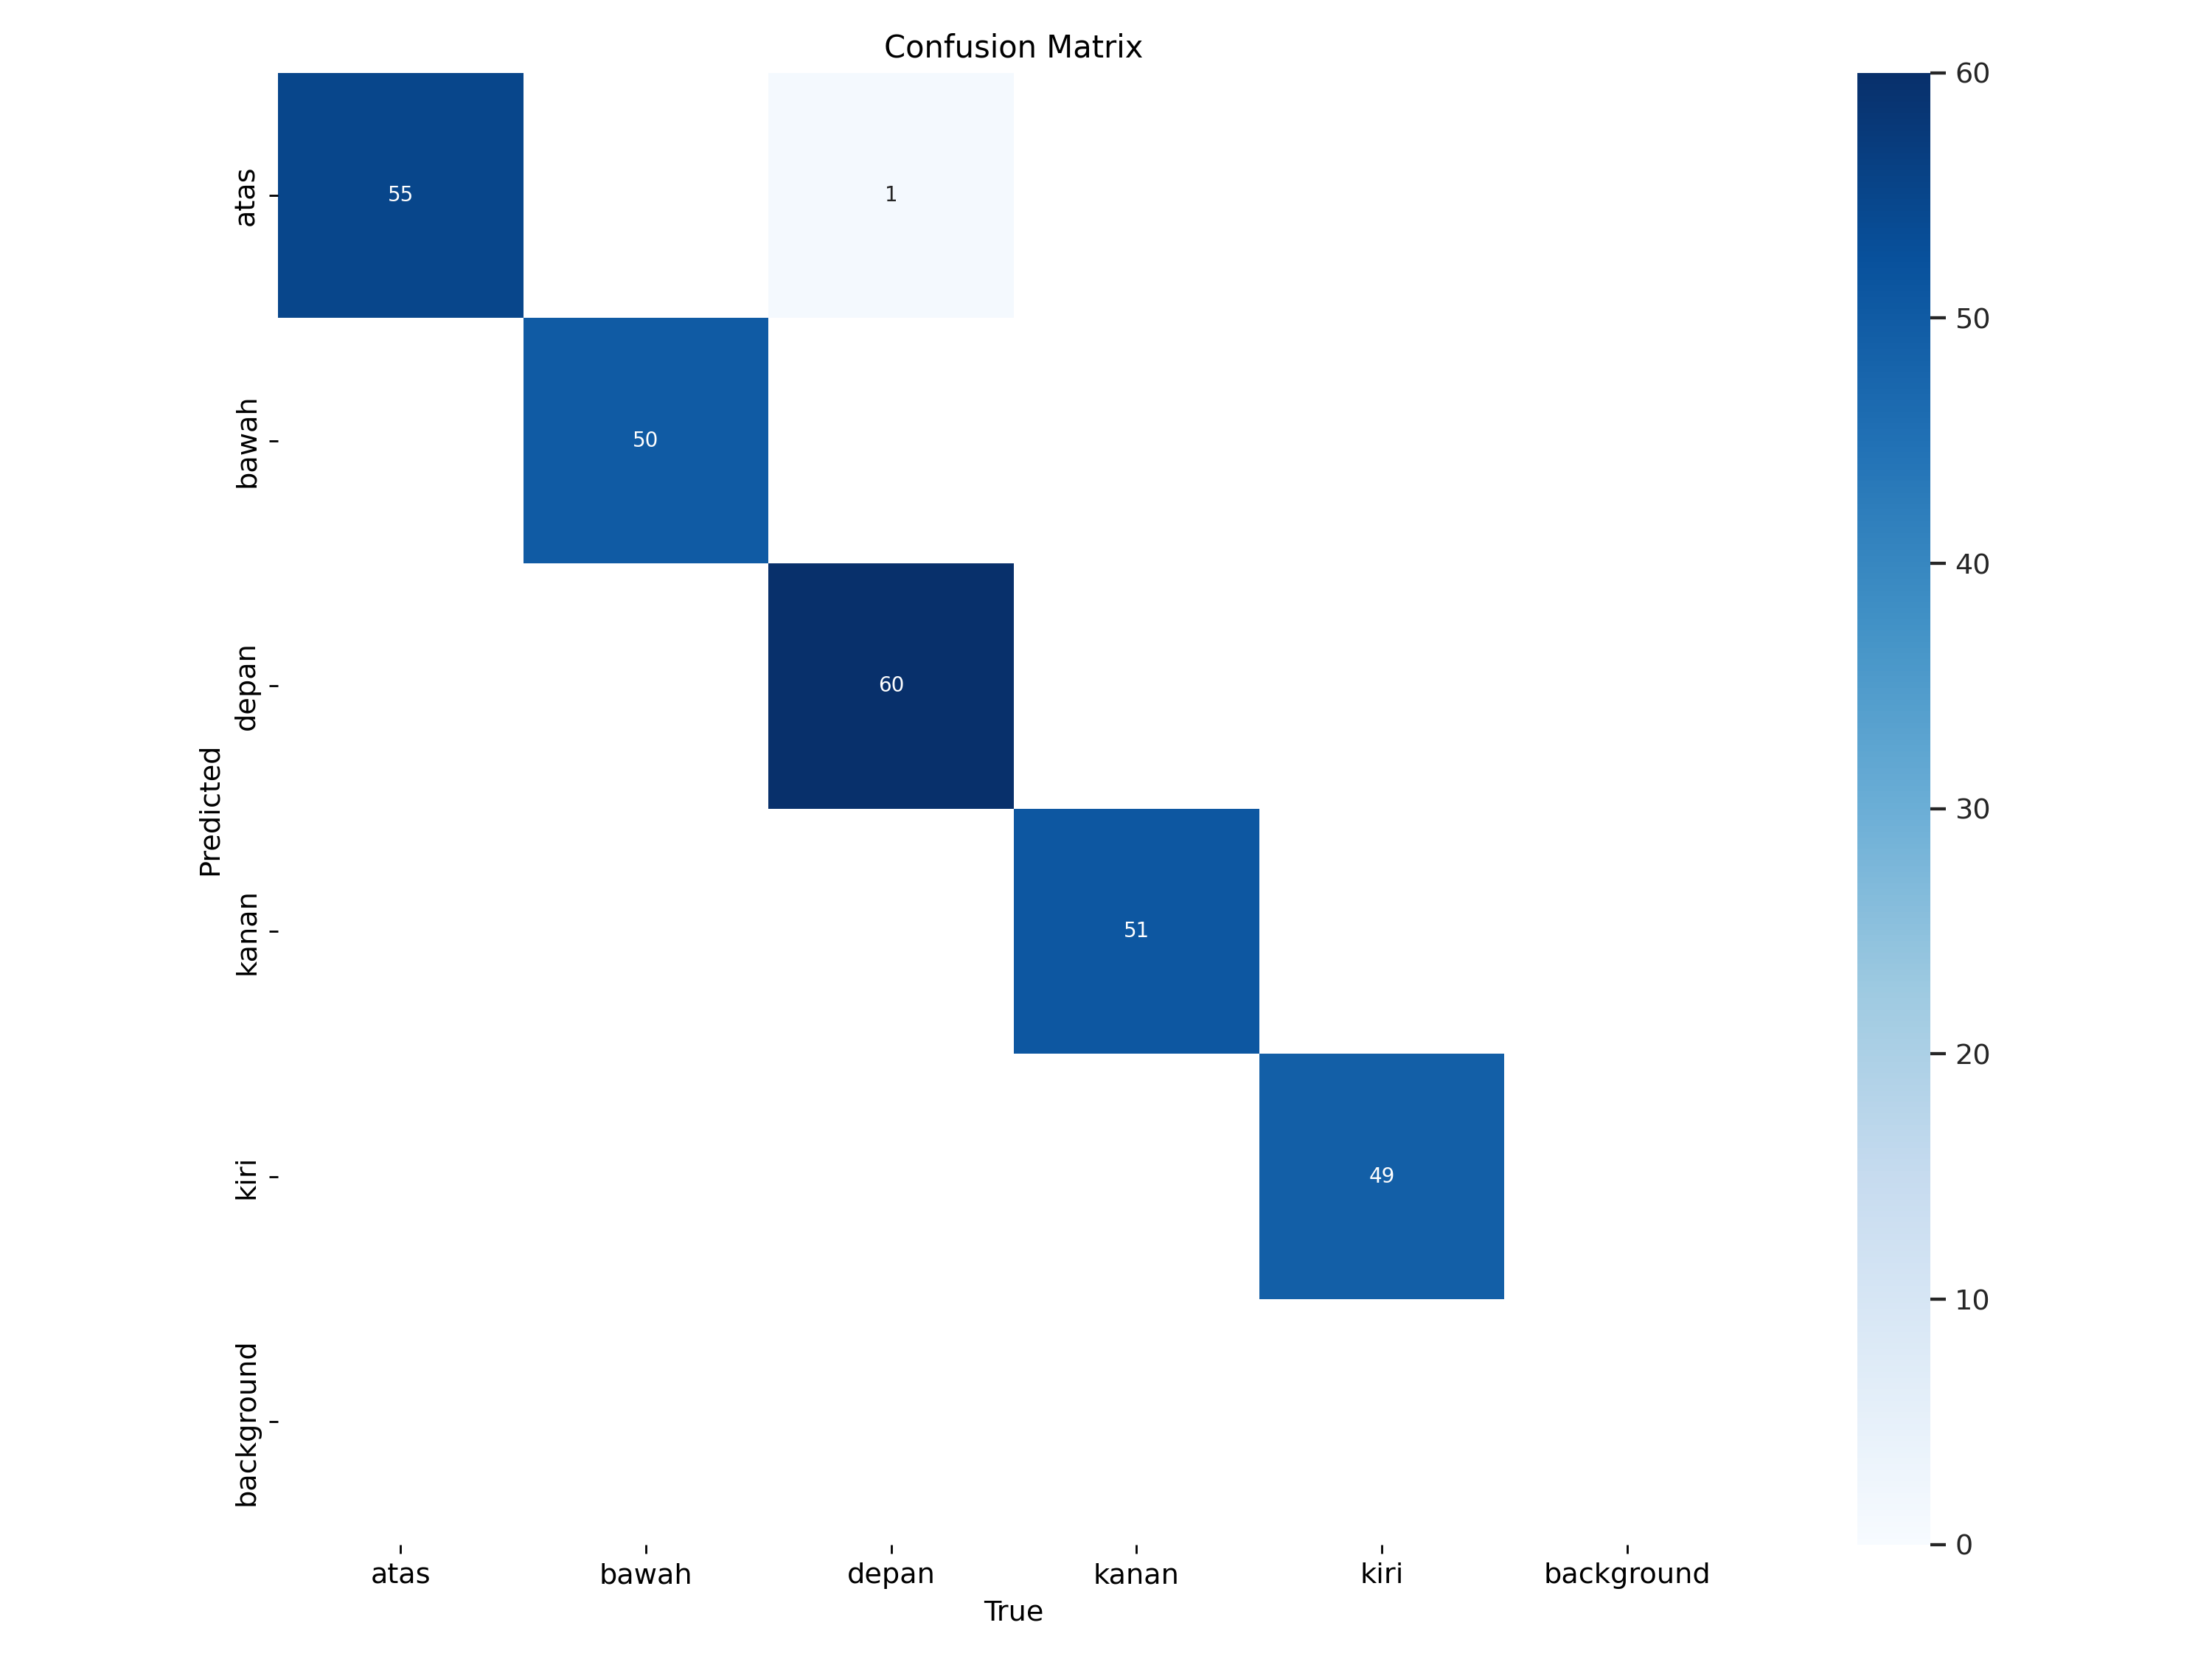

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

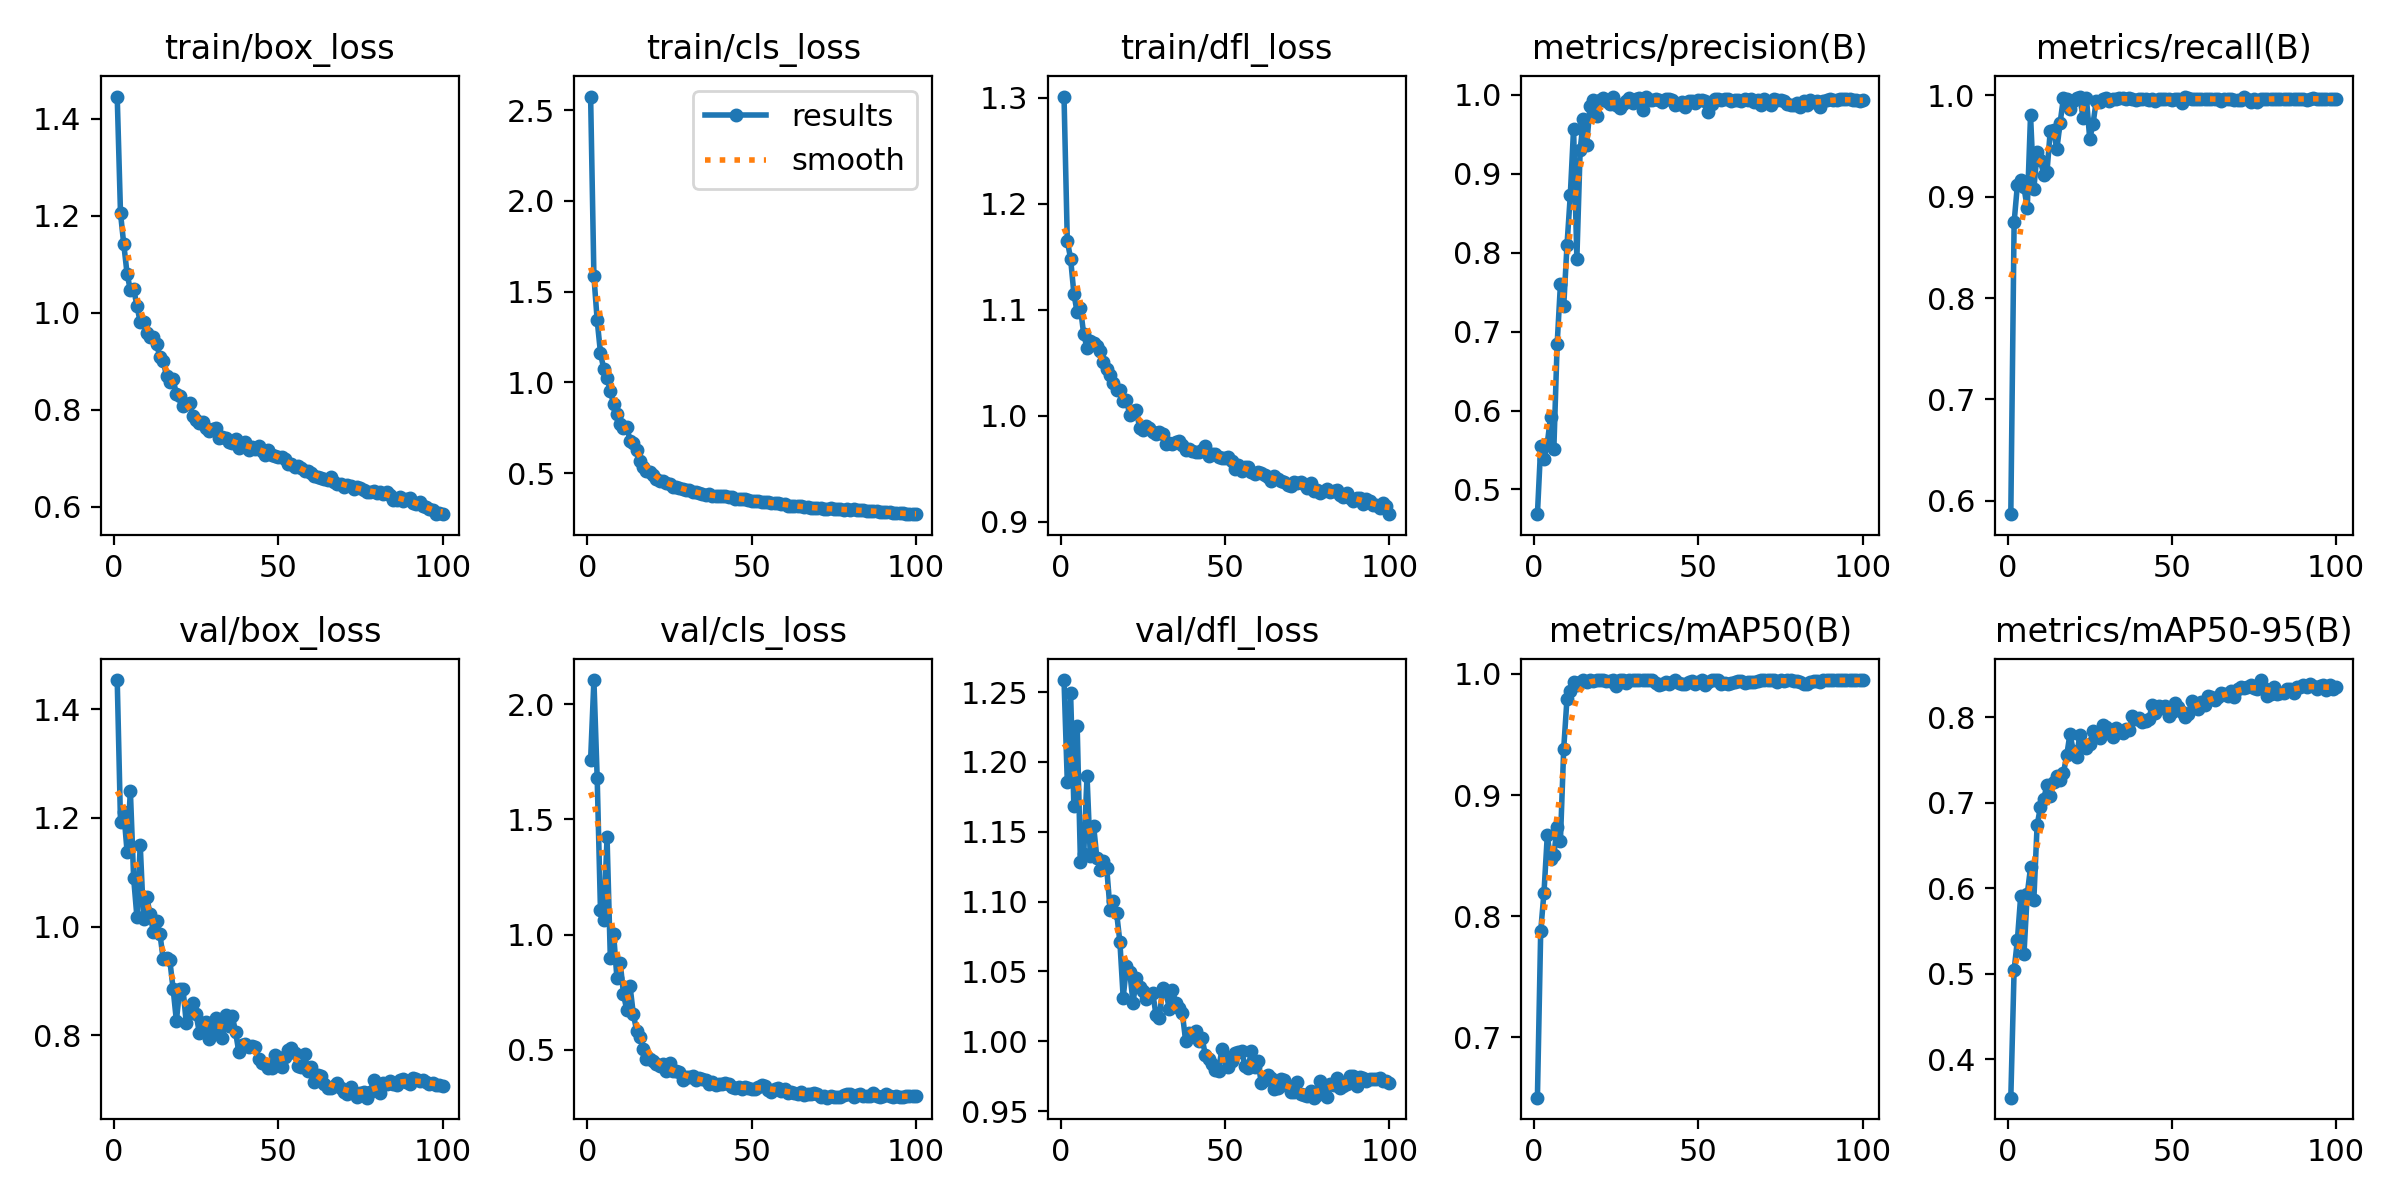

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

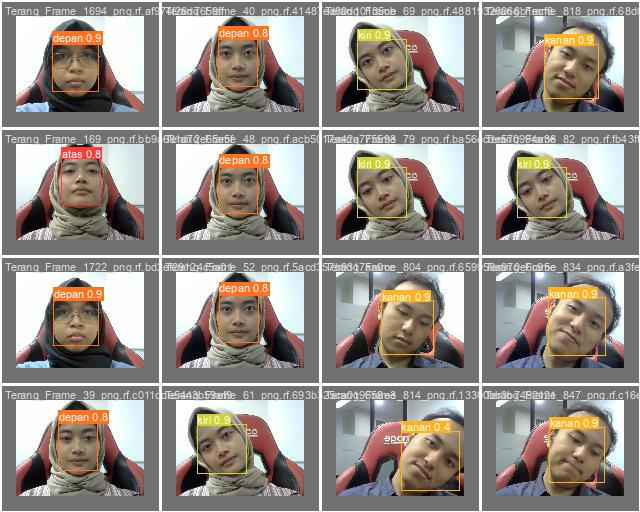

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Head-motion-3/valid/labels.cache... 266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.61it/s]
                   all        266        266      0.988      0.997      0.995      0.842
                  atas        266         55      0.973          1      0.995      0.775
                 bawah        266         50       0.99          1      0.995      0.849
                 depan        266         61      0.989      0.984      0.994      0.853
                 kanan        266         51      0.998          1      0.995      0.845
                  kiri        266         49      0.989          1      0.995      0.888
Speed: 0.0ms preproces

## Inference with Custom Model

In [ ]:
from ultralytics import YOLO
import glob
from PIL import Image

# Specify the directory where your images are located
image_dir = '/content/Head-motion-3/test/images/'

# Use glob to get a list of image file paths
image_paths = glob.glob(image_dir + '*.jpg')

# Check if the image_paths list is empty
if not image_paths:
    print("No image files found in the specified directory.")
else:
    # Initialize a list to store the loaded images
    images = []

    # Load each image using PIL (you can also use OpenCV if preferred)
    for image_path in image_paths:
        image = Image.open(image_path)
        images.append(image)

    # Run inference on the list of loaded images
    model.predict(images, save=True, imgsz=128, rect=True, plots=True, conf=0.5)



0: 96x128 1 bawah, 1: 96x128 1 bawah, 2: 96x128 1 atas, 3: 96x128 1 atas, 4: 96x128 1 kanan, 5: 96x128 1 depan, 6: 96x128 1 kanan, 7: 96x128 1 bawah, 8: 96x128 1 kanan, 9: 96x128 1 kanan, 10: 96x128 1 bawah, 11: 96x128 1 kiri, 12: 96x128 1 bawah, 13: 96x128 1 kanan, 14: 96x128 1 depan, 15: 96x128 1 kanan, 16: 96x128 1 bawah, 17: 96x128 1 atas, 18: 96x128 1 depan, 19: 96x128 1 bawah, 20: 96x128 1 atas, 21: 96x128 1 atas, 22: 96x128 1 depan, 23: 96x128 1 kanan, 24: 96x128 1 kiri, 25: 96x128 1 kanan, 26: 96x128 1 kiri, 27: 96x128 1 atas, 28: 96x128 1 bawah, 29: 96x128 1 bawah, 30: 96x128 1 kiri, 31: 96x128 1 depan, 32: 96x128 1 bawah, 33: 96x128 1 kanan, 34: 96x128 1 bawah, 35: 96x128 1 kanan, 36: 96x128 1 kiri, 37: 96x128 1 bawah, 38: 96x128 1 bawah, 39: 96x128 1 atas, 40: 96x128 1 atas, 41: 96x128 1 depan, 42: 96x128 1 bawah, 43: 96x128 1 kanan, 44: 96x128 1 kanan, 45: 96x128 1 kiri, 46: 96x128 1 atas, 47: 96x128 1 kiri, 48: 96x128 1 bawah, 49: 96x128 1 bawah, 50: 96x128 1 kiri, 51: 96

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

#ZIP

In [ ]:
import zipfile
import os

def zip_folder(source_folder, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(source_folder):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, source_folder)
                zipf.write(file_path, arcname)

source_folder = '/content/runs'
output_path = 'THE_NAME_OF YOUR_FILE.zip'

zip_folder(source_folder, output_path)
print(f'Folder "{source_folder}" zipped to "{output_path}"')


#Move folder

In [ ]:
import shutil

# Source and destination paths
source_path = "/content/runs"
destination_path = "/content/drive/MyDrive/YOUR_DESIRED_PATH"

# Move the directory
shutil.move(source_path, destination_path)
